In [1]:
# importing libraries
import random as rand                                  # random number generation
import gender_guesser.detector as gender               # guess gender based on (given) name
import numpy             as np                         # importing numpy
import pandas            as pd                         # data science essentials
import matplotlib.pyplot as plt                        # data visualization
import seaborn           as sns                        # enhanced data viz
from sklearn.model_selection import train_test_split   # train-test split
from sklearn.linear_model import LogisticRegression    # logistic regression
import statsmodels.formula.api as smf                  # logistic regression
from sklearn.metrics import confusion_matrix           # confusion matrix
from sklearn.metrics import roc_auc_score              # auc score
from sklearn.neighbors import KNeighborsClassifier     # KNN for classification
from sklearn.neighbors import KNeighborsRegressor      # KNN for regression
from sklearn.preprocessing import StandardScaler       # standard scaler
from sklearn.tree import DecisionTreeClassifier        # classification trees
from sklearn.tree import plot_tree                     # tree plots
from sklearn.ensemble import RandomForestClassifier    #randomforest classification
from sklearn.ensemble import GradientBoostingClassifier#GBM classifier    
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer



# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './GOT_character_predictions.xlsx'


# reading the file into Python
got = pd.read_excel(file)


# outputting the first ten rows of the dataset
got.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [2]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {got.shape[0]}
Features:     {got.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     25



In [3]:
#printing for the columns in got
for column in got:
    print(column)

S.No
name
title
culture
dateOfBirth
mother
father
heir
house
spouse
book1_A_Game_Of_Thrones
book2_A_Clash_Of_Kings
book3_A_Storm_Of_Swords
book4_A_Feast_For_Crows
book5_A_Dance_with_Dragons
isAliveMother
isAliveFather
isAliveHeir
isAliveSpouse
isMarried
isNoble
age
numDeadRelations
popularity
isAlive


In [4]:
# setting random seed
rand.seed(a = 327)
# STEP 1: splitting names

# placeholder list
placeholder_lst = []

# looping over each name
for index, col in got.iterrows():
    
    # splitting email domain at '@'
    split_name = got.loc[index, 'name'].split(sep = ' ')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_name)
    

# converting placeholder_lst into a DataFrame 
names = pd.DataFrame(placeholder_lst)


# displaying the results
names

,0,1,2,3,4,5
0,Viserys,II,Targaryen,None,None,None
1,Walder,Frey,None,None,None,None
2,Addison,Hill,None,None,None,None
3,Aemma,Arryn,None,None,None,None
4,Sylva,Santagar,None,None,None,None
...,...,...,...,...,...,...
1941,Luwin,None,None,None,None,None
1942,Reek,None,None,None,None,None
1943,Symeon,Star-Eyes,None,None,None,None
1944,Coldhands,None,None,None,None,None


In [5]:
#getting the info of dataset
got.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [6]:
# STEP 2: concatenating with original DataFrame

first_name = names[0]
print(first_name)

0         Viserys
1          Walder
2         Addison
3           Aemma
4           Sylva
          ...    
1941        Luwin
1942         Reek
1943       Symeon
1944    Coldhands
1945        Tytos
Name: 0, Length: 1946, dtype: object


In [7]:
#     ### guessing gender based on (given) name

#     # placeholder list
#     placeholder_lst = []


#     # looping to guess gender
#     for name in first_name:
#         guess = gender.Detector().get_gender(name)
#         print(guess)
#         placeholder_lst.append(guess)


#     # converting list into a series
#     gender_guess = pd.Series(placeholder_lst)


#     # checking results
#     print(gender_guess)

In [8]:
#saving the values of gender guesser into a list called gender_guess

gender_guess =      ['unknown', 'unknown', 'andy', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male',
                     'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male',
                     'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'unknown', 'female',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'andy', 'andy',
                     'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male',
                     'male', 'male', 'male', 'mostly_male', 'male', 'mostly_male', 'mostly_male', 'unknown', 'unknown',
                     'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown',
                     'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown',
                     'mostly_male', 'unknown', 'unknown', 'male', 'female', 'andy', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_female', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 
                     'unknown', 'unknown', 'andy', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'female', 'female',
                     'female', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown',
                     'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female',
                     'unknown', 'mostly_female', 'female', 'unknown', 'mostly_female', 'unknown', 'female', 'unknown',
                     'female', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'male', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'male', 'male', 'male',
                     'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 
                     'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown',
                     'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male',
                     'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown',
                     'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male',
                     'female', 'male', 'male', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown',
                     'unknown', 'male', 'male', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown',
                     'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown',
                     'andy', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'female', 'male',
                     'unknown', 'male', 'unknown', 'unknown', 'male', 'female', 'female', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown',
                     'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male',
                     'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown',
                     'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown',
                     'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male',
                     'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male',
                     'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 
                     'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'female',
                     'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
                     'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male',
                     'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown',
                     'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female',
                     'male', 'male', 'male', 'male', 'unknown', 'female', 'female', 'female', 'unknown',
                     'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'male', 'male', 'male', 'female', 'male', 'female', 'unknown', 'unknown',
                     'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male',
                     'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'unknown',
                     'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female',
                     'male', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                     'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male',
                     'unknown', 'male', 'male', 'female', 'mostly_female', 'female', 'mostly_female', 'mostly_female',
                     'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'unknown',
                     'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'female',
                     'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown',
                     'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown',
                     'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 
                     'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'male', 'female', 'mostly_male', 'unknown', 'female', 'male', 'male', 'male', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male',
                     'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown',
                     'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown',
                     'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                     'female', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'male', 'male', 'female', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown',
                     'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown',
                     'unknown', 'male', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown',
                     'unknown', 'female', 'unknown', 'female', 'female', 'female', 'male', 'male', 'unknown',
                     'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown',
                     'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown',
                     'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'female',
                     'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
                     'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male',
                     'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'male', 'unknown', 'male', 'male', 'andy', 'male', 'male', 'unknown', 'unknown',
                     'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'male', 'male',
                     'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'unknown',
                     'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'male',
                     'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'female',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown',
                     'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male',
                     'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown',
                     'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown',
                     'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                     'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown',
                     'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown',
                     'male', 'unknown', 'unknown', 'male', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female',
                     'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown',
                     'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 
                     'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 
                     'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male',
                     'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'female', 
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown',
                     'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown',
                     'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 
                     'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown',
                     'male', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 
                     'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown',
                     'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 
                     'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown',
                     'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 
                     'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown',
                     'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                     'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown',
                     'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                     'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                     'mostly_female', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 
                     'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                     'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'mostly_male', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown',
                     'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown']

In [9]:
#adding the gender_guess column to my data
got['gender_guess'] = gender_guess

In [10]:
got.head()

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,gender_guess
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,unknown
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,unknown
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,andy
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,unknown
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,female


In [11]:
#doing getdummies on gender guess to have the male column

one_hot_gender_guess = pd.get_dummies(got['gender_guess'])

In [12]:
#joining the dummies to the data set
got = got.join([one_hot_gender_guess])

In [13]:
#dropping the unnecessary columns
got = got.drop(['female','mostly_female','mostly_male', 'andy','unknown', 'gender_guess'], axis = 1)

In [14]:
got.head(n=10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,male
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,0
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,0
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1,0
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0,0
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0,1
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1,1


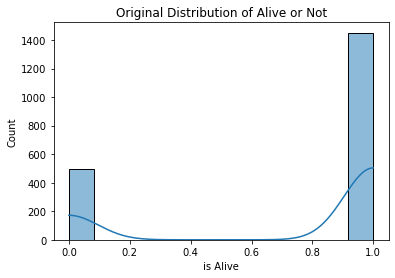

In [15]:
# developing a histogram using HISTPLOT
sns.histplot(data   = got,
             x      = 'isAlive',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Alive or Not")
plt.xlabel(xlabel = "is Alive") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [16]:
#checking the skewness just to know more about the data and y- variable
got['isAlive'].skew()

-1.1289027911166514

In [17]:
#checking skewness of dateOfbirth
got['dateOfBirth'].skew()

14.689314144224944

In [18]:
#running decscriptive statistics on number data of got
got.describe(include = 'number')

,S.No,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,male
count,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,21.000000,26.000000,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,1577.364896,0.198356,0.374615,0.480473,0.591984,0.395170,0.714286,0.192308,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.089584,0.745632,0.195786
std,561.906131,19565.414460,0.398864,0.484148,0.499747,0.491593,0.489013,0.462910,0.401918,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.160568,0.435617,0.396907
min,1.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.013378,0.000000,0.000000
50%,973.500000,268.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.033445,1.000000,0.000000
75%,1459.750000,285.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.086957,1.000000,0.000000
max,1946.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000


In [19]:
#running colleration to find collerated x-variables on isAlive
got.corr().loc[ : , 'isAlive'].round(decimals = 2).sort_values(ascending = False)

isAlive                       1.00
isAliveHeir                   0.38
book4_A_Feast_For_Crows       0.27
isAliveFather                 0.20
isAliveSpouse                 0.17
age                           0.09
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
male                         -0.01
isAliveMother                -0.04
isNoble                      -0.04
isMarried                    -0.05
book2_A_Clash_Of_Kings       -0.07
dateOfBirth                  -0.09
S.No                         -0.13
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations             -0.19
Name: isAlive, dtype: float64

In [20]:
#checking for null values
got.isnull().any()

S.No                          False
name                          False
title                          True
culture                        True
dateOfBirth                    True
mother                         True
father                         True
heir                           True
house                          True
spouse                         True
book1_A_Game_Of_Thrones       False
book2_A_Clash_Of_Kings        False
book3_A_Storm_Of_Swords       False
book4_A_Feast_For_Crows       False
book5_A_Dance_with_Dragons    False
isAliveMother                  True
isAliveFather                  True
isAliveHeir                    True
isAliveSpouse                  True
isMarried                     False
isNoble                       False
age                            True
numDeadRelations              False
popularity                    False
isAlive                       False
male                          False
dtype: bool

In [21]:
got.isnull().sum(axis = 0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
male                             0
dtype: int64

In [22]:
#printing skewness to see what can be done log transform on
print(got['dateOfBirth'].skew())
print(got['isAliveMother'].skew())
print(got['isAliveFather'].skew())
print(got['isAliveHeir'].skew())
print(got['isAliveSpouse'].skew())
print(got['age'].skew())
print(got['numDeadRelations'].skew())
print(got['popularity'].skew())

14.689314144224944
-1.0232748471170303
1.6587111717603973
-0.684484125833842
-1.3520940402056045
-14.689485183250596
5.715191064917628
3.699442286226708


In [23]:
#log transforming dateOfBirth
got['log_dateOfBirth'] = np.log(got['dateOfBirth'])

C:\Users\ABDALLAH BAZZAN\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
got['log_dateOfBirth'].skew()

7.212855849368182

In [25]:
# looping to detect features with missing values
for col in got:

    # creating columns with 1s if missing and 0 if not
    if got[col].isnull().astype(int).sum() > 0:
        got['m_'+col] = got[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
got[    ['m_title', 'm_culture','m_dateOfBirth','m_mother',
             'm_father','m_heir','m_house','m_spouse','m_isAliveMother',
             'm_isAliveFather','m_isAliveHeir','m_isAliveSpouse',
             'm_age', 'm_log_dateOfBirth']    ].sum(axis = 0)

m_title              1008
m_culture            1269
m_dateOfBirth        1513
m_mother             1925
m_father             1920
m_heir               1923
m_house               427
m_spouse             1670
m_isAliveMother      1925
m_isAliveFather      1920
m_isAliveHeir        1923
m_isAliveSpouse      1670
m_age                1513
m_log_dateOfBirth    1515
dtype: int64

In [26]:
#imputing with the median for dateOfBirth,age
dateOfBirth_median = got['dateOfBirth'].median()
log_dateOfBirth_med= got['log_dateOfBirth'].median()
age_median         = got['age'].median()

#filling the isAliveMother,isAliveFather,isAlive... with 0 assuming they are dead
#filling the empty in title with "Not Noble" since only the noble have title
#filling the empy in house,father,mother.. with 'unknown'
got['isAliveMother']  = got['isAliveMother'].fillna(0)
got['isAliveFather']  = got['isAliveFather'].fillna(0)
got['isAliveHeir']    = got['isAliveHeir'].fillna(0)
got['isAliveSpouse']  = got['isAliveSpouse'].fillna(0)
got['dateOfBirth']    = got['dateOfBirth'].fillna(dateOfBirth_median)
got['log_dateOfBirth']= got['log_dateOfBirth'].fillna(log_dateOfBirth_med)
got['age']            = got['age'].fillna(age_median)
got['title']          = got['title'].fillna('Not Noble')
got['culture']        = got['culture'].fillna('unkown')
got['mother']         = got['mother'].fillna('unkown')
got['father']         = got['father'].fillna('unkown')
got['heir']           = got['heir'].fillna('unkown')
got['house']          = got['house'].fillna('unkown')
got['spouse']         = got['spouse'].fillna('unkown')

In [27]:
got.head()

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,male,log_dateOfBirth,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,m_log_dateOfBirth
0,1,Viserys II Targaryen,Not Noble,unkown,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,unkown,unkown,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,27.0,11,0.605351,0,0,5.594711,1,1,1,0,0,0,1,1,0,0,0,1,1,1
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,unkown,unkown,unkown,House Frey,Perra Royce,1,1,1,1,1,0.0,0.0,0.0,1.0,1,1,97.0,1,0.896321,1,0,5.337538,0,0,0,1,1,1,0,0,1,1,1,0,0,0
2,3,Addison Hill,Ser,unkown,268.0,unkown,unkown,unkown,House Swyft,unkown,0,0,0,1,0,0.0,0.0,0.0,0.0,0,1,27.0,0,0.267559,1,0,5.594711,0,1,1,1,1,1,0,1,1,1,1,1,1,1
3,4,Aemma Arryn,Queen,unkown,82.0,unkown,unkown,unkown,House Arryn,Viserys I Targaryen,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,23.0,0,0.183946,0,0,4.406719,0,1,0,1,1,1,0,0,1,1,1,0,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,unkown,unkown,unkown,House Santagar,Eldon Estermont,0,0,0,1,0,0.0,0.0,0.0,1.0,1,1,29.0,0,0.043478,1,0,5.620401,0,0,0,1,1,1,0,0,1,1,1,0,0,0


In [28]:
got.isnull().sum(axis = 0)

S.No                          0
name                          0
title                         0
culture                       0
dateOfBirth                   0
mother                        0
father                        0
heir                          0
house                         0
spouse                        0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
isAliveMother                 0
isAliveFather                 0
isAliveHeir                   0
isAliveSpouse                 0
isMarried                     0
isNoble                       0
age                           0
numDeadRelations              0
popularity                    0
isAlive                       0
male                          0
log_dateOfBirth               0
m_title                       0
m_culture                     0
m_dateOfBirth                 0
m_mother                      0
m_father

In [29]:
got.isnull().any().any()

False

In [30]:
#checking correlation compared to isAlive

df_corr = got.corr(method = 'pearson').round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
m_age                         0.15
m_dateOfBirth                 0.15
m_log_dateOfBirth             0.15
m_isAliveFather               0.14
m_isAliveMother               0.14
m_father                      0.14
m_mother                      0.14
log_dateOfBirth               0.14
m_isAliveHeir                 0.13
m_heir                        0.13
m_isAliveSpouse               0.05
m_spouse                      0.05
age                           0.05
m_title                       0.04
m_house                       0.04
m_culture                     0.04
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
male                         -0.01
isAliveSpouse                -0.01
isNoble                      -0.04
isAliveFather                -0.04
dateOfBirth                  -0.05
isMarried                    -0.05
book2_A_Clash_Of_Kings       -0.07
isAliveHeir                  -0.08
isAliveMother       

In [31]:
#checking the unique values of title
got['title'].unique()

array(['Not Noble', 'Lord of the Crossing', 'Ser', 'Queen', 'Greenstone',
       'Hand of the King', 'Archmaester', 'Maester', 'Khal', 'red hand',
       'Castellan', 'Seven Kingdoms', 'PrincessQueen',
       'Lord of the Iron Islands', 'Lord', 'Brother', 'Lord of Coldmoat',
       'Prince of Dragonstone', 'Lady', 'PrincessSepta', 'Princess',
       'Septa', 'Grand Maester', 'Septon', 'King', 'Seneschal',
       'Bloodrider', 'Stokeworth', 'Prince', 'LadyQueenDowager Queen',
       'Lord of the Tides', 'Lord of Dragonstone', 'Goodman', 'Wisdom',
       'King in the North', 'Winterfell', 'Steward', 'Eyrie',
       'Casterly Rock', 'Cupbearer', 'Hornwood',
       'Lord Steward of the Iron Islands', 'Blue Grace', 'Red Priest',
       'Khalakka', 'Good Master', 'QueenBlack Bride', 'Last Hearth',
       'Lord Paramount of the Mander', 'Seagard', 'Goodwife', 'Uplands',
       'BrotherProctor', 'Coldmoat', 'Ashford', 'Wind Witch', 'LadyQueen',
       'Broad Arch', 'Brightwater', 'Lady Marya',

In [32]:
 #FEATURE ENGINEERING THE TITLE TO BECOME A ONE TITLE FOR EACH OBSERVATION
#I am doing this to be able to do getdummies

got['title'][got['title'].str.contains('Ser')] = 'Ser'
got['title'][got['title'].str.contains('aester')] = 'Maester'
got['title'][got['title'].str.contains('Lord')] = 'Lord'
got['title'][got['title'].str.contains('Sept')] = 'Septon'
got['title'][got['title'].str.contains('Winterfell')] = 'Winterfell'
got['title'][got['title'].str.contains('Princess')] = 'Princess'
got['title'][got['title'].str.contains('Lady')] = 'Lady'
got['title'][got['title'].str.contains('King')] = 'King'
got['title'][got['title'].str.contains('Queen')] = 'Queen'

C:\Users\ABDALL~1\AppData\Local\Temp/ipykernel_9532/3424136664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  got['title'][got['title'].str.contains('Ser')] = 'Ser'
C:\Users\ABDALL~1\AppData\Local\Temp/ipykernel_9532/3424136664.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  got['title'][got['title'].str.contains('aester')] = 'Maester'
C:\Users\ABDALL~1\AppData\Local\Temp/ipykernel_9532/3424136664.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [33]:
# I learned how to use str.contains in a series in data frame from the below reference
# https://towardsdatascience.com/check-for-a-substring-in-a-pandas-dataframe-column-4b949f64852

In [34]:
#Feature engineering the houses
# i want to group the main houses to be able to make getdummies later

got['house'][got['house'].str.contains('Night')] = "House Night"
got['house'][got['house'].str.contains('Frey')] = "House Frey"
got['house'][got['house'].str.contains('Stark')] = "House Stark"
got['house'][got['house'].str.contains('Targaryen')] = "House Targaryen"
got['house'][got['house'].str.contains('Lannister')] = "House Lannister"
got['house'][got['house'].str.contains('Greyjoy')] = "House Greyjoy"
got['house'][got['house'].str.contains('Tyrell')] = "House Tyrell"
got['house'][got['house'].str.contains('Martell')] = "House Martell"
got['house'][got['house'].str.contains('Osgrey')] = "House Osgrey"

C:\Users\ABDALL~1\AppData\Local\Temp/ipykernel_9532/3570311176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  got['house'][got['house'].str.contains('Night')] = "House Night"
C:\Users\ABDALL~1\AppData\Local\Temp/ipykernel_9532/3570311176.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  got['house'][got['house'].str.contains('Frey')] = "House Frey"
C:\Users\ABDALL~1\AppData\Local\Temp/ipykernel_9532/3570311176.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [35]:
#checking unique values of house
got['house'].unique()

array(['unkown', 'House Frey', 'House Swyft', 'House Arryn',
       'House Santagar', 'House Targaryen', 'House Osgrey', 'House Night',
       'House Humble', 'House Wylde', 'House Wode', 'House Fell',
       'Brotherhood Without Banners', 'House Webber', 'House Greyjoy',
       'House Stark', 'House Waynwood', 'House Dayne', 'House Manderly',
       'House Farwynd of the Lonely Light', 'Happy Port',
       'House of Loraq', 'Kingswood Brotherhood', 'House Botley',
       'Burned Men', 'House Velaryon', 'House Tallhart', 'House Tyrell',
       'House Blackwood', 'House Blackfyre', 'wildling',
       'Kingdom of the Three Daughters',
       'House Royce of the Gates of the Moon', 'House Nayland',
       "House Vance of Wayfarer's Rest", 'House Rowan', 'House Farrow',
       'House Lonmouth', 'House Reyne', 'House Ashford', 'House Brax',
       'House Paege', 'House Hollard', 'House Tarth', 'House Ryswell',
       'House Lannister', 'House Crakehall', 'House Darklyn',
       'House Weste

In [36]:
#checking unique values of culture
got['culture'].unique()

array(['unkown', 'Rivermen', 'Dornish', 'Valyrian', 'Ironborn',
       'Free Folk', 'Northmen', 'Summer Isles', 'Braavosi', 'Dothraki',
       'Ghiscari', 'Vale mountain clans', 'Reach', 'Tyroshi', 'Lhazarene',
       'Free folk', 'Ironmen', 'Qartheen', 'Lysene', 'westermen',
       'Westerman', 'Qarth', 'Lyseni', 'northmen', 'Qohor', 'Westeros',
       'Norvoshi', 'First Men', 'Meereenese', 'Andal', 'Astapori',
       'Westermen', 'ironborn', 'Ghiscaricari', 'Braavos', 'Stormlands',
       'Valemen', 'Myrish', 'Lhazareen', 'Dornishmen', 'Sistermen',
       'Northern mountain clans', 'Andals', 'Vale', 'Crannogmen',
       'Wildling', 'Dorne', 'Pentoshi', 'free folk', 'Summer Islander',
       'Westerlands', 'Summer Islands', 'Asshai', 'Riverlands', 'Naathi',
       'Rhoynar', 'Meereen', 'Norvos', 'Stormlander', 'Wildlings',
       'Astapor', 'Reachmen', "Asshai'i", 'Ibbenese', 'The Reach'],
      dtype=object)

In [37]:
#using str.contains from pandas to check for a string inside the observation of culture
#Feature engineering the cultures to group them into the main cultures

got['culture'][got['culture'].str.contains('North')] = "Northmen"
got['culture'][got['culture'].str.contains('ron')] = "Ironmen"
got['culture'][got['culture'].str.contains('ree')] = "Free Folks"
got['culture'][got['culture'].str.contains('Valyrian')] = "Valyrian"
got['culture'][got['culture'].str.contains('Braavos')] = "Braavos"
got['culture'][got['culture'].str.contains('Dorn')] = "Dornish"
got['culture'][got['culture'].str.contains('Ghiscari')] = "Ghiscar"
got['culture'][got['culture'].str.contains('Dothraki')] = "Dothraki"
got['culture'][got['culture'].str.contains('Vale')] = "Valemen"


C:\Users\ABDALL~1\AppData\Local\Temp/ipykernel_9532/2031260748.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  got['culture'][got['culture'].str.contains('North')] = "Northmen"
C:\Users\ABDALL~1\AppData\Local\Temp/ipykernel_9532/2031260748.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  got['culture'][got['culture'].str.contains('ron')] = "Ironmen"
C:\Users\ABDALL~1\AppData\Local\Temp/ipykernel_9532/2031260748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [38]:
# Creating a numeric variable for title

got['title_num'] = (pd.factorize(got['title'], 
                                            sort=True)[0] + 1)
# Creating a numeric variable for house

got['house_num'] = (pd.factorize(got['house'], 
                                            sort=True)[0] + 1)

# Creating a numeric variable for culture

got['culture_num'] = (pd.factorize(got['culture'], 
                                            sort=True)[0] + 1)

In [39]:
# I used pd.factorize to get a numerical value for the title, culture and house, to use it in my classification model
# These are the references that helped me use pd.factorize
# https://pandas.pydata.org/docs/reference/api/pandas.factorize.html
# https://datascience.stackexchange.com/questions/44387/reg-pandas-factorize

In [40]:
got.head()

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,male,log_dateOfBirth,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,m_log_dateOfBirth,title_num,house_num,culture_num
0,1,Viserys II Targaryen,Not Noble,unkown,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,unkown,unkown,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,27.0,11,0.605351,0,0,5.594711,1,1,1,0,0,0,1,1,0,0,0,1,1,1,117,342,50
1,2,Walder Frey,Lord,Rivermen,208.0,unkown,unkown,unkown,House Frey,Perra Royce,1,1,1,1,1,0.0,0.0,0.0,1.0,1,1,97.0,1,0.896321,1,0,5.337538,0,0,0,1,1,1,0,0,1,1,1,0,0,0,102,117,32
2,3,Addison Hill,Ser,unkown,268.0,unkown,unkown,unkown,House Swyft,unkown,0,0,0,1,0,0.0,0.0,0.0,0.0,0,1,27.0,0,0.267559,1,0,5.594711,0,1,1,1,1,1,0,1,1,1,1,1,1,1,149,262,50
3,4,Aemma Arryn,Queen,unkown,82.0,unkown,unkown,unkown,House Arryn,Viserys I Targaryen,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,23.0,0,0.183946,0,0,4.406719,0,1,0,1,1,1,0,0,1,1,1,0,0,0,129,24,50
4,5,Sylva Santagar,Greenstone,Dornish,276.0,unkown,unkown,unkown,House Santagar,Eldon Estermont,0,0,0,1,0,0.0,0.0,0.0,1.0,1,1,29.0,0,0.043478,1,0,5.620401,0,0,0,1,1,1,0,0,1,1,1,0,0,0,67,235,9


In [41]:
# Creating dummies for categorical data - culture and house
title_wdummies = pd.get_dummies((got['title']), 
                                drop_first = True)

culture_wdummies = pd.get_dummies((got['culture']), 
                                  drop_first = True)

house_wdummies = pd.get_dummies((got['house']), 
                                drop_first = True)

got_with_dummies = pd.concat(
                            [got.loc[:, :],
                             title_wdummies, culture_wdummies, house_wdummies],
                             axis = 1)

In [42]:
got_with_dummies.head()

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,male,log_dateOfBirth,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,m_log_dateOfBirth,title_num,house_num,culture_num,Andals,Arbor,Ashford,Banefort,Barrowton,Bear Island,Big BucketThe Wull,Bitterbridge,Black Wind,Blackcrown,Blackmont,Blacktyde,Bloodrider,Blue Grace,Brightwater,Broad Arch,Brother,BrotherProctor,Captain,Captain of the guard,Captain-General,Castellan,Castellan of Harrenhal,CastellanCommander,Casterly Rock,Castle Lychester,Cerwyn,Chief Undergaoler,Claw Isle,Cobblecat,Coldmoat,Coldwater Burn,Commander of the City Watch,Commander of the Second Sons,Crag,Crakehall,Cupbearer,Darry,Deepwood Motte,Dragonstone,Dreadfort,Duskendale,Dyre Den,Eastwatch-by-the-Sea,Eyrie,Fair Isle,Feastfires,Felwood,First Builder,First Ranger,First Sword of Braavos,Foamdrinker,Ghost Hill,Godsgrace,Godswife,Golden Storm,Golden Tooth,Goldengrove,Goldgrass,Good Master,Goodman,Goodwife,Grassy Vale,Green Grace,Greenshield,Greenstone,Grey Glen,Greywater Watch,Gulltown,Harlaw,Harrenhal,Harridan Hill,Hayford,Haystack Hall,Heart's Home,High Steward of Highgarden,Highgarden,Hightower,Horn Hill,Hornvale,Hornwood,Iron Islands,Ironoaks,Karhold,Karl's Hold,Kayce,Keeper of the Gates of the Moon,Khal,KhalKo (formerly),Khalakka,King,Knight,Knight of Griffin's Roost,Lady,Last Hearth,Light of the West,Lonely Light,Longbow Hall,Longsister,Longtable,Lord,Maester,Magister,Magister of Pentos,Magnar of Thenn,Maidenpool,Master of Coin,Master of Deepwood Motte,Master of Harlaw Hall,Master of Whisperers,Master of coin,Master of whisperers,Master-at-Arms,Mistress of whisperers,Nightsong,Not Noble,Oakenshield,Oarmaster,Old Oak,Old Wyk,Pinkmaiden,Prince,Prince of Dorne,Prince of Dragonstone,Prince of the Narrow Sea,Princess,Protector of the Realm,Queen,Rain House,Raventree Hall,Red Flower Vale,Red Jester,Red Priest,Redfort,Rills,Riverrun,Rook's Rest,Ruddy Hall,Runestone,Salt Shore,Sandship,Sandstone,Seagard,Sealord,Sealskin Point,Seneschal,Septon,Ser,Sharp Point,Shatterstone,Skyreach,Slave of R'hllor,Starpike,Steward,Stokeworth,Stone Hedge,Stonehelm,Storm's End,Strongsong,Sunspear,Sweetport Sound,Sweetsister,Ten Towers,Three Sisters,Three Towers,Tower of Glimmering,Tradesman-Captain,Twins,Undergaoler,Uplands,Vaith,Volmark,Warlock,Whitewalls,Widow's Watch,Wind Witch,Winterfell,Wisdom,Wraith,Wyndhall,Yronwood,[1],green lands,master of ships,red hand,the Crossing,the Dreadfort,Andals,Asshai,Asshai'i,Astapor,Astapori,Braavos,Crannogmen,Dornish,Dothraki,First Men,Free Folks,Ghiscar,Ibbenese,Ironmen,Lhazarene,Lysene,Lyseni,Myrish,Naathi,...,House Dondarrion,House Drinkwater,House Drumm,House Dustin,House Egen,House Erenford,House Errol,House Estermont,House Estren,House Farman,House Farring,House Farrow,House Farwynd,House Farwynd of the Lonely Light,House Fell,House Flint,House Flint of Widow's Watch,House Florent,House Foote,House Fossoway,House Fossoway of Cider Hall,House Fossoway of New Barrel,House Fowler,House Frey,House Gargalen,House Gaunt,House Glover,House Goodbrook,House Goodbrother,House Goodbrother of Shatterstone,House Gower,House Graceford,House Grafton,House Grandison,House Greenfield,House Greenhill,House Grell,House Greyjoy,House Grimm,House Haigh,House Harclay,House Hardy,House Hardyng,House Harlaw,House Harlaw of Grey Garden,House Harlaw of Harlaw Hall,House Harlaw of Harridan Hill,House Harlaw of the Tower of Glimmering,House Hasty,House Hawick,House Hayford,House Heddle,House Hetherspoon,House Hewett,House Hightower,House Hoare,House Hogg,House Hollard,House Hornwood,House Horpe,House Humble,House Hunt,House Hunter,House Inchfield,House Ironmaker,House Jast,House J

In [43]:
got_with_dummies['popular_houses'] = (got_with_dummies['House Night']     +
                                      got_with_dummies['House Frey']      +
                                      got_with_dummies['House Stark']     +
                                      got_with_dummies['House Targaryen'] +
                                      got_with_dummies['House Lannister'] +
                                      got_with_dummies['House Greyjoy']   +
                                      got_with_dummies['House Tyrell']    +
                                      got_with_dummies['House Martell']   +
                                      got_with_dummies['House Osgrey'])

In [44]:
got_with_dummies.head()

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,male,log_dateOfBirth,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,m_log_dateOfBirth,title_num,house_num,culture_num,Andals,Arbor,Ashford,Banefort,Barrowton,Bear Island,Big BucketThe Wull,Bitterbridge,Black Wind,Blackcrown,Blackmont,Blacktyde,Bloodrider,Blue Grace,Brightwater,Broad Arch,Brother,BrotherProctor,Captain,Captain of the guard,Captain-General,Castellan,Castellan of Harrenhal,CastellanCommander,Casterly Rock,Castle Lychester,Cerwyn,Chief Undergaoler,Claw Isle,Cobblecat,Coldmoat,Coldwater Burn,Commander of the City Watch,Commander of the Second Sons,Crag,Crakehall,Cupbearer,Darry,Deepwood Motte,Dragonstone,Dreadfort,Duskendale,Dyre Den,Eastwatch-by-the-Sea,Eyrie,Fair Isle,Feastfires,Felwood,First Builder,First Ranger,First Sword of Braavos,Foamdrinker,Ghost Hill,Godsgrace,Godswife,Golden Storm,Golden Tooth,Goldengrove,Goldgrass,Good Master,Goodman,Goodwife,Grassy Vale,Green Grace,Greenshield,Greenstone,Grey Glen,Greywater Watch,Gulltown,Harlaw,Harrenhal,Harridan Hill,Hayford,Haystack Hall,Heart's Home,High Steward of Highgarden,Highgarden,Hightower,Horn Hill,Hornvale,Hornwood,Iron Islands,Ironoaks,Karhold,Karl's Hold,Kayce,Keeper of the Gates of the Moon,Khal,KhalKo (formerly),Khalakka,King,Knight,Knight of Griffin's Roost,Lady,Last Hearth,Light of the West,Lonely Light,Longbow Hall,Longsister,Longtable,Lord,Maester,Magister,Magister of Pentos,Magnar of Thenn,Maidenpool,Master of Coin,Master of Deepwood Motte,Master of Harlaw Hall,Master of Whisperers,Master of coin,Master of whisperers,Master-at-Arms,Mistress of whisperers,Nightsong,Not Noble,Oakenshield,Oarmaster,Old Oak,Old Wyk,Pinkmaiden,Prince,Prince of Dorne,Prince of Dragonstone,Prince of the Narrow Sea,Princess,Protector of the Realm,Queen,Rain House,Raventree Hall,Red Flower Vale,Red Jester,Red Priest,Redfort,Rills,Riverrun,Rook's Rest,Ruddy Hall,Runestone,Salt Shore,Sandship,Sandstone,Seagard,Sealord,Sealskin Point,Seneschal,Septon,Ser,Sharp Point,Shatterstone,Skyreach,Slave of R'hllor,Starpike,Steward,Stokeworth,Stone Hedge,Stonehelm,Storm's End,Strongsong,Sunspear,Sweetport Sound,Sweetsister,Ten Towers,Three Sisters,Three Towers,Tower of Glimmering,Tradesman-Captain,Twins,Undergaoler,Uplands,Vaith,Volmark,Warlock,Whitewalls,Widow's Watch,Wind Witch,Winterfell,Wisdom,Wraith,Wyndhall,Yronwood,[1],green lands,master of ships,red hand,the Crossing,the Dreadfort,Andals,Asshai,Asshai'i,Astapor,Astapori,Braavos,Crannogmen,Dornish,Dothraki,First Men,Free Folks,Ghiscar,Ibbenese,Ironmen,Lhazarene,Lysene,Lyseni,Myrish,Naathi,...,House Drinkwater,House Drumm,House Dustin,House Egen,House Erenford,House Errol,House Estermont,House Estren,House Farman,House Farring,House Farrow,House Farwynd,House Farwynd of the Lonely Light,House Fell,House Flint,House Flint of Widow's Watch,House Florent,House Foote,House Fossoway,House Fossoway of Cider Hall,House Fossoway of New Barrel,House Fowler,House Frey,House Gargalen,House Gaunt,House Glover,House Goodbrook,House Goodbrother,House Goodbrother of Shatterstone,House Gower,House Graceford,House Grafton,House Grandison,House Greenfield,House Greenhill,House Grell,House Greyjoy,House Grimm,House Haigh,House Harclay,House Hardy,House Hardyng,House Harlaw,House Harlaw of Grey Garden,House Harlaw of Harlaw Hall,House Harlaw of Harridan Hill,House Harlaw of the Tower of Glimmering,House Hasty,House Hawick,House Hayford,House Heddle,House Hetherspoon,House Hewett,House Hightower,House Hoare,House Hogg,House Hollard,House Hornwood,House Horpe,House Humble,House Hunt,House Hunter,House Inchfield,House Ironmaker,House Jast,House Jordayne,House Kar

In [45]:
#this to checkc for how much alive for houses 
got_with_dummies.loc[ : , ['isAlive','house'] ]

,isAlive,house
0,0,unkown
1,1,House Frey
2,1,House Swyft
3,0,House Arryn
4,1,House Santagar
...,...,...
1941,0,House Stark
1942,0,House Bolton
1943,1,unkown
1944,1,Three-eyed crow


In [46]:
### Then I was looking in the excel file on which of the houses had the most dead people
# I am grouping the most alive houses

got_with_dummies['most_alive_house']= (
                                       got_with_dummies['House Frey']      +
                                       got_with_dummies['House Stark']     +
                                       got_with_dummies['House Lannister'] +
                                       got_with_dummies['House Tyrell']    +
                                       got_with_dummies['House Martell']   +
                                       got_with_dummies['House Osgrey'])

In [47]:
# I am grouping the the most alive titles together in a column called most_alive_title
got_with_dummies['most_alive_title'] = (
                             got_with_dummies['Maester'] +
                             got_with_dummies['Septon'] +
                             got_with_dummies['Ser'])


In [48]:
# Grouping the most alive cultures together
got_with_dummies['most_alive_cultures'] = (
                                    got_with_dummies['Northmen'] + 
                                    got_with_dummies['Ironmen'] +
                                    got_with_dummies['Free Folks'] +
                                    got_with_dummies['Braavos'])

In [49]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [50]:
df_corr = got_with_dummies.corr(method = 'pearson').round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                    1.00
book4_A_Feast_For_Crows    0.27
m_log_dateOfBirth          0.15
m_age                      0.15
m_dateOfBirth              0.15
                           ... 
book1_A_Game_Of_Thrones   -0.15
House Targaryen           -0.17
popularity                -0.18
numDeadRelations          -0.19
Valyrian                  -0.21
Name: isAlive, Length: 619, dtype: float64

In [51]:
got_with_dummies.head()

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,male,log_dateOfBirth,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,m_log_dateOfBirth,title_num,house_num,culture_num,Andals,Arbor,Ashford,Banefort,Barrowton,Bear Island,Big BucketThe Wull,Bitterbridge,Black Wind,Blackcrown,Blackmont,Blacktyde,Bloodrider,Blue Grace,Brightwater,Broad Arch,Brother,BrotherProctor,Captain,Captain of the guard,Captain-General,Castellan,Castellan of Harrenhal,CastellanCommander,Casterly Rock,Castle Lychester,Cerwyn,Chief Undergaoler,Claw Isle,Cobblecat,Coldmoat,Coldwater Burn,Commander of the City Watch,Commander of the Second Sons,Crag,Crakehall,Cupbearer,Darry,Deepwood Motte,Dragonstone,Dreadfort,Duskendale,Dyre Den,Eastwatch-by-the-Sea,Eyrie,Fair Isle,Feastfires,Felwood,First Builder,First Ranger,First Sword of Braavos,Foamdrinker,Ghost Hill,Godsgrace,Godswife,Golden Storm,Golden Tooth,Goldengrove,Goldgrass,Good Master,Goodman,Goodwife,Grassy Vale,Green Grace,Greenshield,Greenstone,Grey Glen,Greywater Watch,Gulltown,Harlaw,Harrenhal,Harridan Hill,Hayford,Haystack Hall,Heart's Home,High Steward of Highgarden,Highgarden,Hightower,Horn Hill,Hornvale,Hornwood,Iron Islands,Ironoaks,Karhold,Karl's Hold,Kayce,Keeper of the Gates of the Moon,Khal,KhalKo (formerly),Khalakka,King,Knight,Knight of Griffin's Roost,Lady,Last Hearth,Light of the West,Lonely Light,Longbow Hall,Longsister,Longtable,Lord,Maester,Magister,Magister of Pentos,Magnar of Thenn,Maidenpool,Master of Coin,Master of Deepwood Motte,Master of Harlaw Hall,Master of Whisperers,Master of coin,Master of whisperers,Master-at-Arms,Mistress of whisperers,Nightsong,Not Noble,Oakenshield,Oarmaster,Old Oak,Old Wyk,Pinkmaiden,Prince,Prince of Dorne,Prince of Dragonstone,Prince of the Narrow Sea,Princess,Protector of the Realm,Queen,Rain House,Raventree Hall,Red Flower Vale,Red Jester,Red Priest,Redfort,Rills,Riverrun,Rook's Rest,Ruddy Hall,Runestone,Salt Shore,Sandship,Sandstone,Seagard,Sealord,Sealskin Point,Seneschal,Septon,Ser,Sharp Point,Shatterstone,Skyreach,Slave of R'hllor,Starpike,Steward,Stokeworth,Stone Hedge,Stonehelm,Storm's End,Strongsong,Sunspear,Sweetport Sound,Sweetsister,Ten Towers,Three Sisters,Three Towers,Tower of Glimmering,Tradesman-Captain,Twins,Undergaoler,Uplands,Vaith,Volmark,Warlock,Whitewalls,Widow's Watch,Wind Witch,Winterfell,Wisdom,Wraith,Wyndhall,Yronwood,[1],green lands,master of ships,red hand,the Crossing,the Dreadfort,Andals,Asshai,Asshai'i,Astapor,Astapori,Braavos,Crannogmen,Dornish,Dothraki,First Men,Free Folks,Ghiscar,Ibbenese,Ironmen,Lhazarene,Lysene,Lyseni,Myrish,Naathi,...,House Egen,House Erenford,House Errol,House Estermont,House Estren,House Farman,House Farring,House Farrow,House Farwynd,House Farwynd of the Lonely Light,House Fell,House Flint,House Flint of Widow's Watch,House Florent,House Foote,House Fossoway,House Fossoway of Cider Hall,House Fossoway of New Barrel,House Fowler,House Frey,House Gargalen,House Gaunt,House Glover,House Goodbrook,House Goodbrother,House Goodbrother of Shatterstone,House Gower,House Graceford,House Grafton,House Grandison,House Greenfield,House Greenhill,House Grell,House Greyjoy,House Grimm,House Haigh,House Harclay,House Hardy,House Hardyng,House Harlaw,House Harlaw of Grey Garden,House Harlaw of Harlaw Hall,House Harlaw of Harridan Hill,House Harlaw of the Tower of Glimmering,House Hasty,House Hawick,House Hayford,House Heddle,House Hetherspoon,House Hewett,House Hightower,House Hoare,House Hogg,House Hollard,House Hornwood,House Horpe,House Humble,House Hunt,House Hunter,House Inchfield,House Ironmaker,House Jast,House Jordayne,House Karstark,House Kenning of Harlaw,House Kennin

In [52]:
# declaring explanatory variables
got_with_dummies_data   = got_with_dummies.drop(['isAlive','dateOfBirth','m_dateOfBirth'], axis = 1)


# declaring response variable
got_with_dummies_target = got_with_dummies.loc[ : , 'isAlive' ]

In [53]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            got_with_dummies_data,
            got_with_dummies_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_with_dummies_target) # preserving balance


# merging training data for statsmodels
got_with_dummies_train = pd.concat([x_train, y_train], axis = 1)

In [54]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")





Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



In [55]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~ book4_A_Feast_For_Crows""",
                           data = got_with_dummies_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC


Optimization terminated successfully.
         Current function value: 0.534562
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.057     
Dependent Variable:  isAlive           AIC:               1876.0368 
Date:                2021-12-05 19:55  BIC:               1886.9727 
No. Observations:    1751              Log-Likelihood:    -936.02   
Df Model:            1                 LL-Null:           -992.53   
Df Residuals:        1749              LLR p-value:       2.1241e-26
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept               0.4601   0.0765  6.0172 0.0000 0.3102 0.6100
book4_A_Feast_For_Crows 1.1895   0.1141 10.4212 0.0000 0.9658 1.4132
====================================================================

"""

In [56]:
for val in got_with_dummies_data:
    print(f" {val} + ")

 S.No + 
 name + 
 title + 
 culture + 
 mother + 
 father + 
 heir + 
 house + 
 spouse + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 male + 
 log_dateOfBirth + 
 m_title + 
 m_culture + 
 m_mother + 
 m_father + 
 m_heir + 
 m_house + 
 m_spouse + 
 m_isAliveMother + 
 m_isAliveFather + 
 m_isAliveHeir + 
 m_isAliveSpouse + 
 m_age + 
 m_log_dateOfBirth + 
 title_num + 
 house_num + 
 culture_num + 
 Andals + 
 Arbor + 
 Ashford + 
 Banefort + 
 Barrowton + 
 Bear Island + 
 Big BucketThe Wull + 
 Bitterbridge + 
 Black Wind + 
 Blackcrown + 
 Blackmont + 
 Blacktyde + 
 Bloodrider + 
 Blue Grace + 
 Brightwater + 
 Broad Arch + 
 Brother + 
 BrotherProctor + 
 Captain + 
 Captain of the guard + 
 Captain-General + 
 Castellan + 
 Castellan of Harr

In [57]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~    
                                                     book1_A_Game_Of_Thrones + 
                                                     book3_A_Storm_Of_Swords + 
                                                     book4_A_Feast_For_Crows + 
                                                     popularity + 
                                                     log_dateOfBirth
                                                     """,
                                        data    = got_with_dummies_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.497669
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.122     
Dependent Variable:    isAlive            AIC:                1754.8374 
Date:                  2021-12-05 19:55   BIC:                1787.6451 
No. Observations:      1751               Log-Likelihood:     -871.42   
Df Model:              5                  LL-Null:            -992.53   
Df Residuals:          1745               LLR p-value:        2.5516e-50
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------------
Intercept               -9.8619   2.2704 -4.3436 0.0000 -14.3119 -5.4120
book1_A_Game_Of_Thrones -0.6545   0.1479 -4.4264 0.0000  -0.9443 -0.3647
book3_A_Storm_Of_Swords -0.4020   0.1373 -2.9282 0.0034  -0.6711 -0.1329
book4_A_Feast_For_Crows  1.4806   0.1378 10.7459 0.0000   1.2106  1.7507
popularity              -2.0201   0.3477 -5.8091 0.0000  -2.7016 -1.3385
log_dateOfBirth          1.9254   0.4092  4.7049 0.0000   1.1233  2.7275
========================================================================

"""

In [58]:
# train/test split with the full model
got_with_dummies_data   =  got_with_dummies.loc[ : ,  [  'book1_A_Game_Of_Thrones',  
                                                         'book3_A_Storm_Of_Swords', 
                                                         'book4_A_Feast_For_Crows', 
                                                         'popularity',
                                                         'log_dateOfBirth'] ]
got_with_dummies_target =  got_with_dummies.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_with_dummies_data,
            got_with_dummies_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_with_dummies_target)

# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy
# area under the roc curve (auc)
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                            y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

Training ACCURACY: 0.7824
Testing  ACCURACY: 0.841
AUC Score        : 0.7031


In [59]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 21  29]
 [  2 143]]


In [60]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 21
False Positives: 29
False Negatives: 2
True Positives : 143



--------------------- 
The confusion matrix has a high number of false positives = 29 and a good number of true positives = 143
This means that the model will predict people to be alive when they are actually not alive
----------------------

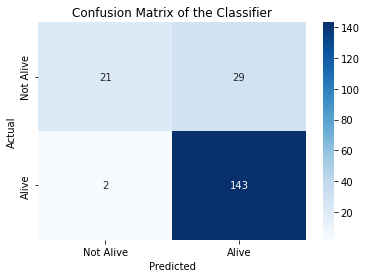

In [61]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Not Alive', 'Alive'])

        ---------------------------------------- KNN MODEL REGRESSION ----------------------------------------

In [62]:
############# KNN Modeling Data #############
got_with_dummies_data = got_with_dummies.loc[ : , [      'book1_A_Game_Of_Thrones',  
                                                         'book3_A_Storm_Of_Swords', 
                                                         'book4_A_Feast_For_Crows', 
                                                         'popularity',
                                                         'numDeadRelations',
                                                         'log_dateOfBirth' ] ]
got_with_dummies_target = got_with_dummies.loc[ :, 'isAlive']

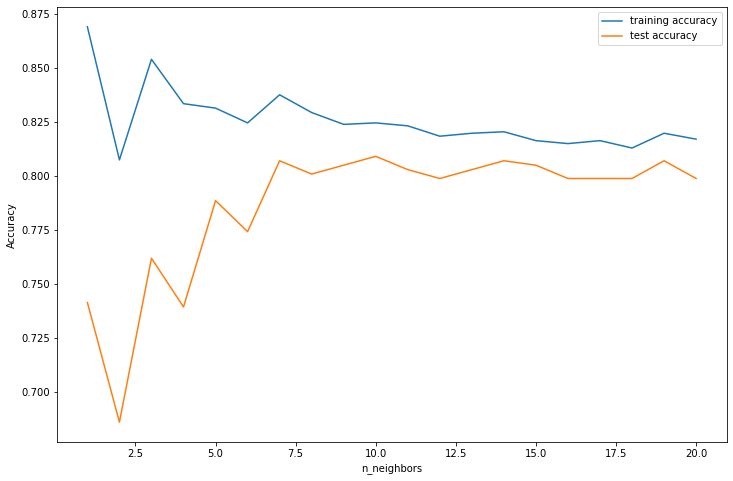

The optimal number of neighbors is: 10


In [63]:
########## MODEL FOR KNN #############
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = got_with_dummies_data,
                                  y_data        = got_with_dummies_target,
                                  response_type = 'class')

In [64]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(got_with_dummies_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(got_with_dummies_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            got_with_dummies_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_with_dummies_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.8258
Testing  ACCURACY: 0.8564
AUC Score        : 0.779


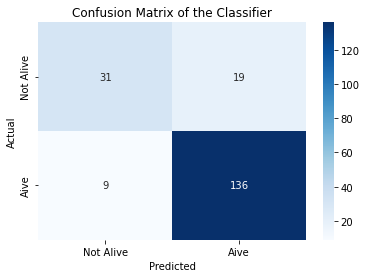

In [65]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Not Alive', 'Aive'])

In [66]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 31
False Positives: 19
False Negatives: 9
True Positives : 136



The confusion matrix has 18 false positives and 140 true positives. The model will predict 18 people to be alive when they are actually not alive and 5 people to be dead when they are alive. 

                            ----------- MODELING THE CART MODEL ---------------

In [67]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [68]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8881
Full Tree Testing ACCURACY : 0.7846
Full Tree AUC Score: 0.7176


In [69]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 21
True Positives : 124



The confusion matrix has 21 false positives and 119 true positives. The model will predict 21 people to be alive when they are actually not alive and 26 people to be dead when they are alive. 

In [70]:


# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.795
Testing  ACCURACY: 0.8154
AUC Score        : 0.64


In [71]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 14
False Positives: 36
False Negatives: 0
True Positives : 145



The confusion matrix has 36 false positives and 145 true positives. The model will predict 36 people to be alive when they are actually not alive and 0 people to be dead when they are alive. 

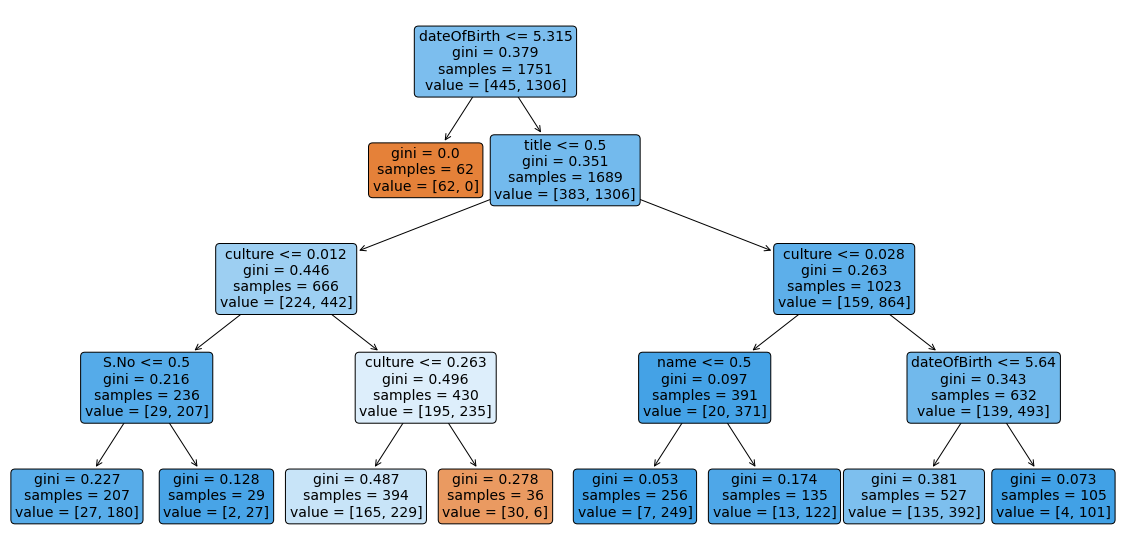

In [72]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = pruned_tree_fit, # changing to pruned_tree_fit
          feature_names = got_with_dummies.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [73]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}          {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}           {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)




Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.7031         (21, 29, 2, 143)
Full Tree     0.7176          (29, 21, 21, 124)
Pruned Tree   0.64           (14, 36, 0, 145)



In [74]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [75]:
#### EXPLANATORY VARIABLES and Target FOR RANDOM FOREST MODEL
# train/test split with the full model
got_with_dummies_data   =  got_with_dummies.loc[ : ,  [  'book1_A_Game_Of_Thrones',  
                                                         'book4_A_Feast_For_Crows',
                                                         'book5_A_Dance_with_Dragons',
                                                         'most_alive_title',
                                                         'most_alive_cultures',
                                                         'house_num',
                                                         'culture_num',
                                                         'isNoble',
                                                         'popularity',
                                                         'log_dateOfBirth',
                                                         'numDeadRelations'] ]
got_with_dummies_target =  got_with_dummies.loc[ : , 'isAlive']

# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            got_with_dummies_data,
            got_with_dummies_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_with_dummies_target)

In [76]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [77]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.9834
Testing  ACCURACY: 0.8667
AUC Score        : 0.7924


In [78]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 32
False Positives: 18
False Negatives: 8
True Positives : 137



The confusion matrix has 17 false positives and 134 true positives. The model will predict 17 people to be alive when they are actually not alive and 11 people to be dead when they are alive. 

In [79]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.7031,0.7824,0.8410,"(21, 29, 2, 143)"
1,Full Tree,0.7176,0.8881,0.7846,"(29, 21, 21, 124)"
2,Pruned Tree,0.6400,0.7950,0.8154,"(14, 36, 0, 145)"
3,Random Forest (Full),0.7924,0.9834,0.8667,"(32, 18, 8, 137)"


In [80]:
### GRADIENT BOOSTED MACHINES MODEL ###
# train/test split with the full model
got_with_dummies_data   =  got_with_dummies.loc[ : ,  [  'book1_A_Game_Of_Thrones',
                                                         'book4_A_Feast_For_Crows',
                                                         'book5_A_Dance_with_Dragons',
                                                         'house_num',
                                                         'culture_num',
                                                         'isNoble',
                                                         'popularity',
                                                         'log_dateOfBirth',
                                                         'numDeadRelations'] ]
got_with_dummies_target =  got_with_dummies.loc[ : , 'isAlive']

# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            got_with_dummies_data,
            got_with_dummies_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_with_dummies_target)

In [81]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8578
Testing ACCURACY : 0.8615
AUC Score        : 0.7562


In [82]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 27
False Positives: 23
False Negatives: 4
True Positives : 141



The confusion matrix has 23 false positives and 141 true positives. The model will predict 23 people to be alive when they are actually not alive and 4 people to be dead when they are alive. 

In [83]:
# declaring model performance objects
gbm_train_df_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_df_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc_df      = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_df_acc,
                          'Testing Accuracy'  : gbm_test_df_acc,
                          'AUC Score'         : gbm_auc_df,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.7031,0.7824,0.8410,"(21, 29, 2, 143)"
1,Full Tree,0.7176,0.8881,0.7846,"(29, 21, 21, 124)"
2,Pruned Tree,0.6400,0.7950,0.8154,"(14, 36, 0, 145)"
3,Random Forest (Full),0.7924,0.9834,0.8667,"(32, 18, 8, 137)"
4,GBM (Full),0.7562,0.8578,0.8615,"(27, 23, 4, 141)"


NOW I HAVE THE MODELS WITHOUT TUNING 
THE GBM Model has the lowest gap and a good AUC score and
The RF model has the best AUC score

I will do hyper parameter tuning on 

1) Random Forest Classification
2) Gradient Boosted Machine

In [84]:
got_with_dummies_data   =  got_with_dummies.loc[ : ,  [  'book1_A_Game_Of_Thrones',  
                                                         'book4_A_Feast_For_Crows',
                                                         'book5_A_Dance_with_Dragons',
                                                         'house_num',
                                                         'culture_num',
                                                         'isNoble',
                                                         'popularity',
                                                         'log_dateOfBirth',
                                                         'numDeadRelations'] ]
got_with_dummies_target =  got_with_dummies.loc[ : , 'isAlive']
# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            got_with_dummies_data,
            got_with_dummies_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_with_dummies_target)

In [85]:
# # FITTING the training data
# rf_default_fit = rf_default.fit(x_train, y_train)


# # PREDICTING based on the testing set
# rf_default_fit_pred = rf_default_fit.predict(x_test)


# # declaring a hyperparameter space
# estimator_range  = np.arange(100, 1100, 250)
# leaf_range       = np.arange(1, 31, 10)
# criterion_range  = ['gini', 'entropy']
# bootstrap_range  = [True, False]
# warm_start_range = [True, False]


# # creating a hyperparameter grid
# param_grid = {'n_estimators'     : estimator_range,
#               'min_samples_leaf' : leaf_range,
#               'criterion'        : criterion_range,
#               'bootstrap'        : bootstrap_range,
#               'warm_start'       : warm_start_range}


# # INSTANTIATING the model object without hyperparameters
# forest_grid = RandomForestClassifier(random_state = 219)


# # GridSearchCV object
# forest_cv = RandomizedSearchCV(estimator           = forest_grid,
#                                param_distributions = param_grid,
#                                cv         = 3,
#                                n_iter     = 1000,
#                                scoring    = make_scorer(roc_auc_score,
#                                             needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# forest_cv.fit(got_with_dummies_data, got_with_dummies_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", forest_cv.best_params_)
# print("Tuned Training AUC:", forest_cv.best_score_.round(4))

In [86]:
# best estimators based on RandomizedSearchCV
#forest_cv.best_estimator_

In [87]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'entropy',
                                      min_samples_leaf = 5,
                                      n_estimators     = 250,
                                      warm_start       = True,
                                      bootstrap        = False,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(got_with_dummies_data, got_with_dummies_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8995
Forest Tuned Testing  ACCURACY: 0.9385
Forest Tuned AUC Score        : 0.8997


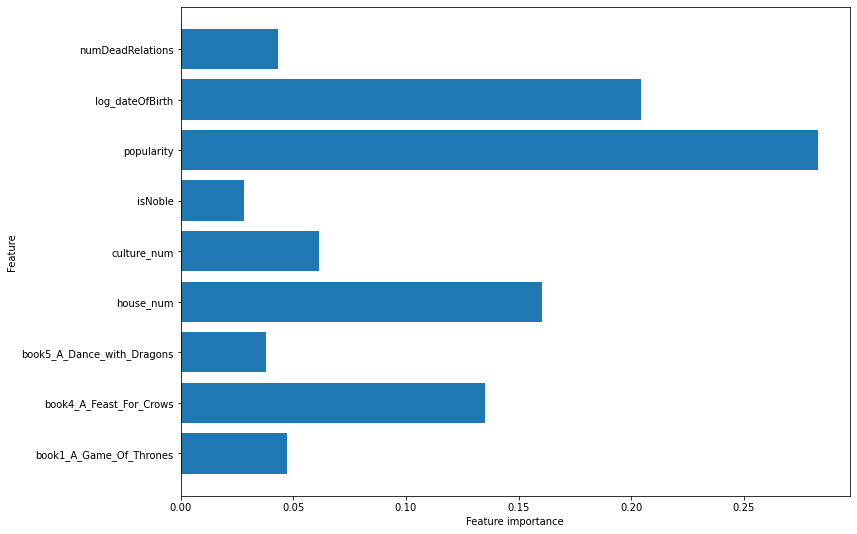

In [88]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [89]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 41
False Positives: 9
False Negatives: 3
True Positives : 142



In [100]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.7031,0.7824,0.8410,"(21, 29, 2, 143)"
1,Full Tree,0.7176,0.8881,0.7846,"(29, 21, 21, 124)"
2,Pruned Tree,0.6400,0.7950,0.8154,"(14, 36, 0, 145)"
3,Random Forest (Full),0.7924,0.9834,0.8667,"(32, 18, 8, 137)"
4,GBM (Full),0.7562,0.8578,0.8615,"(27, 23, 4, 141)"
5,Tuned Random Forest (Full),0.8997,0.8995,0.9385,"(41, 9, 3, 142)"
6,Tuned GBM,0.8728,0.9001,0.9179,"(39, 11, 5, 140)"
7,Tuned Random Forest (Full),0.8997,0.8995,0.9385,"(41, 9, 3, 142)"


               ------------------- HyperParameter Tuning the GBM Model -------------------------

In [91]:
# setting explanatory variables and target variable
got_with_dummies_data   =  got_with_dummies.loc[ : ,  [  'book1_A_Game_Of_Thrones',
                                                         'book4_A_Feast_For_Crows',
                                                         'book5_A_Dance_with_Dragons',
                                                         'house_num',
                                                         'culture_num',
                                                         'isNoble',
                                                         'popularity',
                                                         'log_dateOfBirth',
                                                         'numDeadRelations'] ]
got_with_dummies_target =  got_with_dummies.loc[ : , 'isAlive']

In [92]:
# # declaring a hyperparameter space
# learn_range        = np.arange(0.1, 2.2, 0.5)
# estimator_range    = np.arange(100, 501, 25)
# depth_range        = np.arange(2, 11, 2)
# warm_start_range   = [True, False]

# # creating a hyperparameter grid
# param_grid = {'learning_rate' : learn_range,
#               'max_depth'     : depth_range,
#               'n_estimators'  : estimator_range,
#               'warm_start'    : warm_start_range}


# # INSTANTIATING the model object without hyperparameters
# full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# # GridSearchCV object
# full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
#                            param_distributions = param_grid,
#                            cv                  = 3,
#                            n_iter              = 500,
#                            random_state        = 219,
#                            scoring             = make_scorer(roc_auc_score,
#                                                  needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# full_gbm_cv.fit(got_with_dummies_data, got_with_dummies_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", full_gbm_cv.best_params_)
# print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

In [93]:
# checking the best estimator for the model
#full_gbm_cv.best_estimator_

In [94]:
# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            got_with_dummies_data,
            got_with_dummies_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_with_dummies_target)

In [95]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.5,
                                       max_depth     = 2,
                                       n_estimators  = 350,
                                       warm_start    = False,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(got_with_dummies_data, got_with_dummies_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.9001
Testing  ACCURACY: 0.9179
AUC Score        : 0.8728


In [96]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 39
False Positives: 11
False Negatives: 5
True Positives : 140



In [97]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.7031,0.7824,0.8410,"(21, 29, 2, 143)"
1,Full Tree,0.7176,0.8881,0.7846,"(29, 21, 21, 124)"
2,Pruned Tree,0.6400,0.7950,0.8154,"(14, 36, 0, 145)"
3,Random Forest (Full),0.7924,0.9834,0.8667,"(32, 18, 8, 137)"
4,GBM (Full),0.7562,0.8578,0.8615,"(27, 23, 4, 141)"
5,Tuned Random Forest (Full),0.8997,0.8995,0.9385,"(41, 9, 3, 142)"
6,Tuned GBM,0.8728,0.9001,0.9179,"(39, 11, 5, 140)"


In [98]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
5,Tuned Random Forest (Full),0.8997,0.8995,0.9385,"(41, 9, 3, 142)"
6,Tuned GBM,0.8728,0.9001,0.9179,"(39, 11, 5, 140)"
3,Random Forest (Full),0.7924,0.9834,0.8667,"(32, 18, 8, 137)"
4,GBM (Full),0.7562,0.8578,0.8615,"(27, 23, 4, 141)"
1,Full Tree,0.7176,0.8881,0.7846,"(29, 21, 21, 124)"
0,Logistic,0.7031,0.7824,0.8410,"(21, 29, 2, 143)"
2,Pruned Tree,0.6400,0.7950,0.8154,"(14, 36, 0, 145)"


In [101]:
# comparing results
print("The confusion matrix is shown as: TrueNegative, FalsePositive, FalseNegative, TruePositive")
print(f"""
Model                AUC Score         Train Score          Test Score              Confusion Matrix
-----               -----------        ----------          -----------            ------------------
Logistic             {logreg_auc_score}             {logreg_train_score}               {logreg_test_score}                   {logreg_tn},{logreg_fp},{logreg_fn},{logreg_tp}
KNN                  {knn_auc_score}              {knn_train_score}               {knn_test_score}                  {knn_tree_tn},{knn_tree_fp},{knn_tree_fn},{knn_tree_tp}
FullTREE             {full_tree_auc_score}              {full_tree_train_score}               {full_tree_test_score}                  {full_tree_tn},{full_tree_fp},{full_tree_fn},{full_tree_tp}
RandForest           {rf_auc}             {rf_train_acc}               {rf_test_acc}                  {rf_tn},{rf_fp},{rf_fn},{rf_tp}
GBM                  {gbm_auc_df}             {gbm_train_df_acc}               {gbm_test_df_acc}                  {gbm_default_tn},{gbm_default_fp},{gbm_default_fn},{gbm_default_tp}
Tuned RF*            {tuned_rf_auc}             {tuned_rf_train_acc}               {tuned_rf_test_acc}                  {tuned_rf_tn},{tuned_rf_fp},{tuned_rf_fn},{tuned_rf_tp}
Tuned GBM            {gbm_auc}             {gbm_train_acc}               {gbm_test_acc}                  {gbm_tuned_tn},{gbm_tuned_fp},{gbm_tuned_fn},{gbm_tuned_tp}
""") 

print(f"""My FINAL MODEL IS TUNED RANDOM FOREST MODEL WHICH HAS AUC SCORE of: {tuned_rf_auc}\n
This model has {tuned_rf_tn} True Negatives, {tuned_rf_fp} False Positives, {tuned_rf_fn} False Negatives, and {tuned_rf_tp} True Positives.
Meaning that this model have the least False Positives and False Negatives and can predict the best
The model predicts {tuned_rf_tn} to be dead and they are actually dead, {tuned_rf_fp} to be alive but are actually dead,
{tuned_rf_fn} to be dead but are actually alive, and {tuned_rf_tp} to be alive and are actually alive. """)


The confusion matrix is shown as: TrueNegative, FalsePositive, FalseNegative, TruePositive

Model                AUC Score         Train Score          Test Score              Confusion Matrix
-----               -----------        ----------          -----------            ------------------
Logistic             0.7031             0.7824               0.841                   21,29,2,143
KNN                  0.779              0.8258               0.8564                  31,19,9,136
FullTREE             0.7176              0.8881               0.7846                  29,21,21,124
RandForest           0.7924             0.9834               0.8667                  32,18,8,137
GBM                  0.7562             0.8578               0.8615                  27,23,4,141
Tuned RF*            0.8997             0.8995               0.9385                  41,9,3,142
Tuned GBM            0.8728             0.9001               0.9179                  39,11,5,140

My FINAL MODEL IS TUNED R